# LINEAR REGRESSION

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

import warnings
import importlib
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
def compute_metrics_regression(y, y_pred):
    mse = mean_squared_error(y, y_pred, squared=True) #mse
    rmse = mean_squared_error(y, y_pred, squared=False) #rmse    
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    # prevent infinite by cause of negativiy
    msle = None
    rmsle = None
    if (np.min(y) >=0)*(np.min(y_pred)>=0):
        msle = mean_squared_log_error(y, y_pred, squared=True) #msle    
        rmsle = mean_squared_log_error(y, y_pred, squared=False) #rmsle    
    #return {'mse':mse, 'rmse':rmse, 'mae':mae, 'mape':mape, 'msle':msle, 'rmsle':msle}
    return {'mse':mse, 'rmse':rmse, 'mae':mae}
    
def plot_results(y_train, y_train_pred, y_test, y_test_pred, figsize=[20,8]):
    df_result_train_plot = pd.DataFrame(np.hstack([y_train, y_train_pred]))
    df_result_train_plot.columns = ['train', 'train_pred']

    df_result_test_plot = pd.DataFrame(np.hstack([y_test, y_test_pred]))
    df_result_test_plot.columns = ['test', 'test_pred']
    
    fig, ax = plt.subplots(1, 2) #figsize=[50,16])
    df_result_train_plot.plot(style='.', figsize=figsize, ax=ax[0])
    ax[0].set_xlabel('index')
    ax[0].set_ylabel('target')
    df_result_test_plot.plot(style='.-', figsize=figsize, ax=ax[1])    
    ax[1].set_xlabel('index')
    ax[1].set_ylabel('target')
    
def plot_two_num_variables(df, column_x, column_y, show_distrib=False):    
    if show_distrib:
        sns.jointplot(df.loc[:,column_x], df.loc[:,column_y], kind="reg")
    else:
        df[[column_x, column_y]].plot.scatter(x=column_x, y=column_y,  ylim=(0,800000))    
    

# 1. Datos para regression

## $$\{\pmb{x_i}, y_i\}_{i=1}^N~~;~~\pmb{x_i}\in R^D, y_i\in R$$

In [81]:
df_train, df_target = make_regression(
    n_samples = 1000,
    n_features=20, 
    n_informative=1,
    bias=0.5,        
    random_state=42,
    noise = 0.9, #50,#0.9,
    tail_strength = 0.7
)

df_train = pd.DataFrame(df_train)
df_train.columns = ['feat_'+str(i+1) for i in range(df_train.shape[1])]

df_target = pd.DataFrame(df_target)
df_target.columns = ['target']

df_train = df_train.fillna(0.0)
df_target = df_target.fillna(0.0)

num_outliers = 1000
num_examples = 1000
random_index = np.random.randint(0, num_examples, num_outliers)

array_sign = np.sign(np.random.rand(num_outliers)-0.5)
array_noise = np.int_(np.round(df_train.iloc[random_index,0]*np.random.rand(num_outliers)))
scaler = np.random.randint(5, 100, num_outliers)
# df_train.iloc[random_index,0] = array_sign*array_noise + scaler #uncomment to see the feature scaler effect 

print("data size: ", df_train.shape, df_target.shape)

data size:  (1000, 20) (1000, 1)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20
854,-0.826491,-1.246340,-0.486586,-0.024830,-2.252534,1.380123,0.043024,-0.429833,-0.627461,-0.224920,1.067468,-0.189180,-0.347990,0.559355,-0.156194,-0.174711,-0.866973,0.412641,0.066141,0.217439
711,1.004822,-0.421103,1.601899,-2.550026,0.467575,-0.788309,-0.737262,0.543654,-0.469958,-0.787551,2.277689,1.138911,1.819077,-0.870163,-2.225935,-2.161056,-0.423437,0.386025,-0.489944,-0.235980
141,1.480183,-0.100028,-0.259687,-0.278585,-1.212741,-0.832070,-1.628254,0.097417,-0.706743,0.165385,-1.769510,0.648547,-0.064310,-1.084968,0.042263,-0.651952,0.508763,0.353039,2.842594,1.741384
570,-0.072329,-0.697079,0.335218,-0.370796,-0.768194,0.943769,-0.701064,-0.162528,-0.845934,1.311602,0.486886,-1.372791,-0.901565,0.924578,-0.503931,0.194839,-0.737626,2.228154,0.193922,-0.731633
65,-0.021332,0.323632,-0.784567,0.207838,-2.098187,1.208323,2.148239,-1.037326,-1.790651,0.183242,-0.586843,1.321881,-1.999987,0.244785,-0.047059,0.902678,1.682663,-0.398592,-0.295481,-0.753189
831,0.122298,-0.429406,0.278994,-0.294950,-0.662901,-0.835347,0.048860,-0.673491,-0.692905,-1.243863,0.040592,-1.402605,-0.701992,2.145149,1.749577,0.125225,0.543298,1.247742,0.894924,-0.718407
38,0.462548,0.951021,-1.350797,-2.016294,0.809779,0.862058,0.781429,0.653865,0.930873,-0.433284,-0.425193,-1.344887,-0.378984,-0.111519,-2.142720,-0.980971,0.377061,0.315497,0.857292,0.255560
608,0.793489,0.810808,-0.209222,1.310309,1.126705,-1.683438,1.304340,-0.562168,-0.214921,-1.105705,-1.662492,-1.090966,1.032546,-0.805870,-0.410814,-0.134309,-1.748532,1.395684,0.779661,-0.308034
768,0.256783,-0.139542,-0.051236,0.817467,0.296573,0.625585,0.667065,0.307039,1.479482,-0.391025,-1.545056,0.533695,-0.363312,-0.223272,1.492953,0.460416,-0.228473,-0.913459,1.328646,-0.659024
333,1.268359,0.106435,-0.145229,-0.326418,-1.228945,-0.082446,1.219943,1.160953,0.686289,1.457438,0.720357,0.149872,0.332613,0.687140,0.596794,-0.182315,0.936806,0.429351,-1.031998,1.240383


,target
145,-0.741807
663,3.281276
87,-6.054903
124,0.966849
907,10.056002
229,1.002730
861,2.239077
266,3.844407
31,5.976526
756,-15.217989


Text(0, 0.5, 'target')

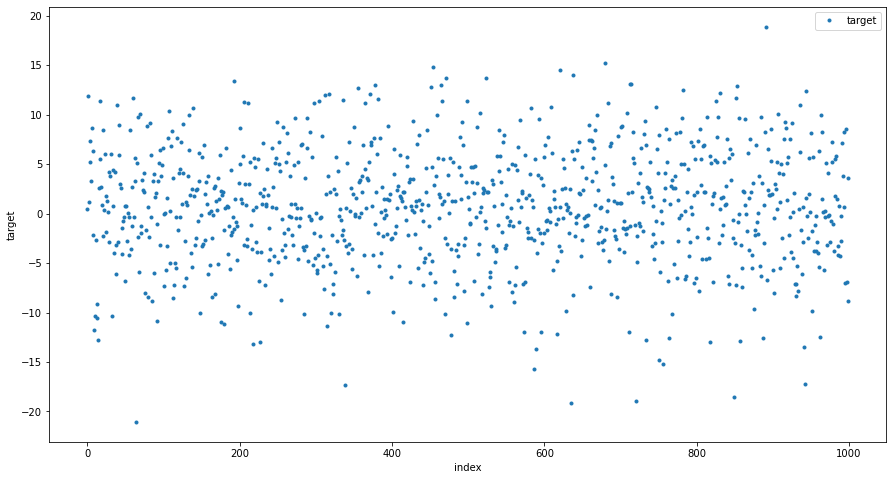

In [82]:
display(df_train.sample(10))
display(df_target.sample(10))

fig, ax = plt.subplots(1, 1)
figsize=(15, 8)
df_target.plot(style='.', figsize=figsize, ax=ax)
ax.set_xlabel('index')
ax.set_ylabel('target')

Text(0, 0.5, 'target')

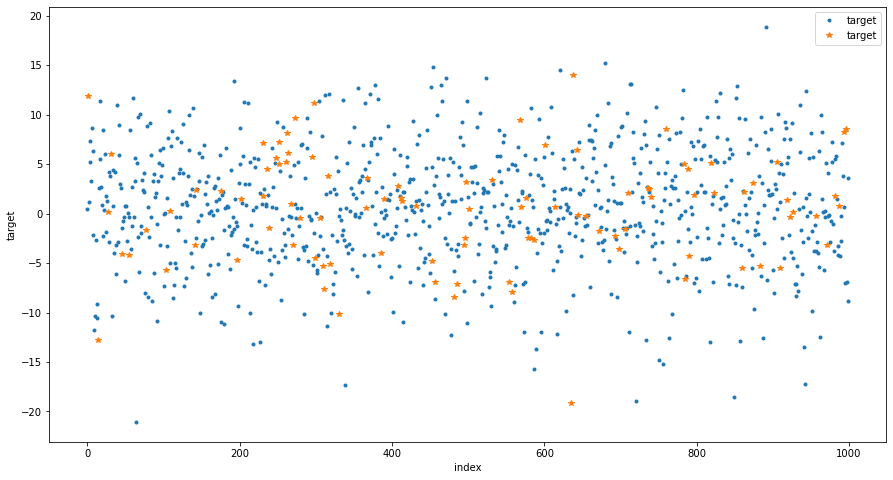

In [83]:
## Train/Test
X_train, X_test, Y_train, Y_test = train_test_split(df_train, df_target, test_size=0.1, random_state=0)

fig, ax = plt.subplots(1, 1)
figsize=(15, 8)
Y_train.plot(style='.', figsize=figsize, ax=ax)
Y_test.plot(style='*', figsize=figsize, ax=ax)
ax.set_xlabel('index')
ax.set_ylabel('target')

# 2. Preprocesamiento:  Feature scaling
* Remover la media (media=0) 
* Escalar la variance (var=1)

Sea 
### $\pmb{feat} = (feat_{1},...,feat_{i},...feat_{N})$
## $$feat_{i}^{'} = \frac{feat_{i} - \mu{(\pmb{feat})}}{\sigma_{\pmb{feat}}} \in R$$ 

Donde 
### $$\mu{(\pmb{feat})} = \frac{1}{N}\sum_{i=1}^N feat_{i}$$

In [84]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
X_test_scaled.columns = X_test.columns   

X_train_scaled.shape, X_test_scaled.shape

x_train, x_val, y_train, y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=0)

In [85]:
X_train['feat_1'].mean()

-0.07100470883384537

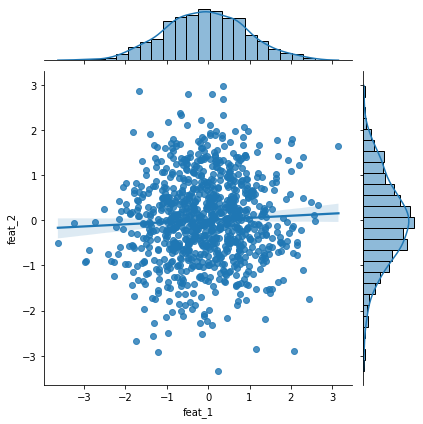

In [86]:
plot_two_num_variables(X_train, column_x='feat_1', column_y='feat_2', show_distrib=True)

In [87]:
X_train_scaled['feat_1'].mean()

1.2335811384723962e-19

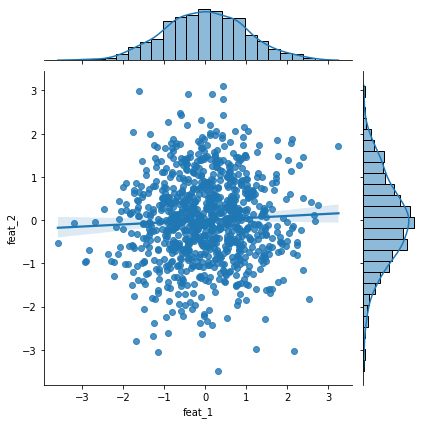

In [88]:
plot_two_num_variables(X_train_scaled, column_x='feat_1', column_y='feat_2', show_distrib=True)

# 2. Model

## Approximated function: 
## $$f(\pmb{x_i}, \pmb{\theta}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Dx_D \in R~;~\pmb{\theta} \in R^{D+1}$$

Donde

## $\pmb{x_i} = (x_1,...,x_l,...x_D)$

In [24]:
X_train_scaled

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20
785,1.310312,0.374758,-0.279173,-0.589685,1.378683,-0.219001,-1.540482,-0.266080,-0.585601,-1.275121,1.597920,0.867692,0.550154,0.549791,-0.043196,-0.390560,0.736236,-2.795587,1.474615,1.599010
873,-0.078958,1.088285,-2.154832,0.451743,1.440673,0.196723,0.249119,-1.318803,-0.002410,-0.201270,1.775682,0.990767,0.437018,0.244742,-0.982902,-0.754503,-0.959838,-2.912259,0.996823,0.093654
65,-0.985647,0.334660,-0.769755,0.248329,-2.090697,1.206809,2.053617,-1.055167,-1.781697,0.165006,-0.582506,1.310256,-2.050897,0.249292,-0.080267,0.846604,1.660520,-0.401026,-0.237416,-0.775169
902,1.914342,-0.227577,0.932048,0.089850,0.257170,0.632488,-2.626812,0.117978,-0.828229,-1.036872,-0.169664,-1.542993,0.074304,2.895048,0.204049,-0.038228,-0.075288,-0.815179,2.114927,0.715685
317,-0.949988,-1.582381,0.129563,1.259864,0.200757,-0.937611,-0.815784,-1.072164,-0.455724,0.484317,0.186987,1.495382,-0.462172,-0.849228,0.602262,2.016331,0.947426,-1.517871,-0.148793,-1.515841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.909735,0.413614,-1.668650,-1.407228,-1.497080,0.827311,-0.363581,0.762800,-0.450384,-1.618336,0.102588,-1.939893,1.112952,0.855599,-0.645035,0.204785,-0.307013,0.062039,-0.843703,0.497364
192,-0.501779,1.240081,1.475177,2.035587,0.092855,2.246395,1.031906,0.421234,-0.818828,-1.562469,-0.560207,0.855231,-0.831537,-0.438198,0.114368,2.086934,1.001579,-1.378159,-0.013533,-0.086842
629,1.400916,0.564147,-0.374801,-0.622333,0.062697,1.009252,-0.800263,-0.885880,-1.655829,0.611882,-1.768809,0.260145,-1.667255,-0.620872,-0.976751,-1.680558,0.542918,0.040329,-1.169898,-0.078843
559,1.582126,1.426557,1.573255,0.018269,-0.601729,-0.644579,-0.273001,1.054340,0.833022,1.556449,1.612285,1.510594,-0.689509,0.838523,-0.496361,-0.342189,0.800016,0.093997,-1.783323,-0.168601


In [83]:
# cor_x = np.arange(0, 21, 0.5)*np.random.rand(42)
# cor_y = np.arange(0, 21, 0.5)*np.random.rand(42)
# x_tmp = np.array([1, 0.5, 1])
# theta_tmp = np.random.rand(3)
# theta_tmp

# print(x_tmp)
# print(theta_tmp)
# f = np.sum(x_tmp*theta_tmp)
# print(f)

# l = []
# for i in range(len(cor_x)):    
#     f = np.sum(np.array([1, cor_x[i], cor_y[i]])*theta_tmp)
#     l.append(f)
# pd.DataFrame(l).plot(style='.')    

# 3. Entrenamiento
## Loss function
## $$L(\pmb{\theta}) = \frac{1}{N}\sum_{i=1}^N (y_i - f(\pmb{x_i}, \theta))^2 \in R$$

## Encontrar $\hat{\pmb{\theta}}$ que minimize $L(\hat{\pmb{\theta}})$

## Method 1: 
## $$\frac{\partial{L(\pmb{\theta})}}{\partial{\theta_i}} = 0$$

In [89]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

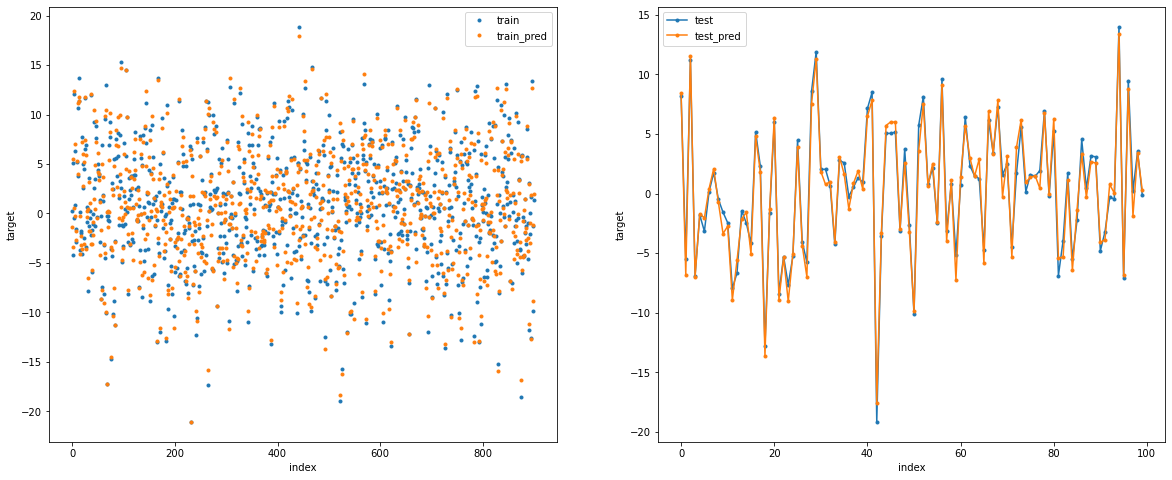

In [91]:
plot_results(Y_train, y_train_predict, Y_test.values, y_test_predict)
# plot_results(Y_train, y_train_predict, Y_test.values[0:10], y_test_predict[0:10])

# 4 Evaluacion 

## Metricas  para regression

Lets $\hat{y}_i = f(\pmb{x_i}, \hat{\pmb{\theta}})$

### Mean squared error (MSE): 
Penalize large distances, not robust to outliers.
### $$MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2 \in R$$ 
### Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{MSE} \in R$$

### Mean absolute error~(MAE):
Robust to outliers
### $$MAE = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}_i| \in R$$

In [92]:
# Y_train = Y_train
y_train_predict = y_train_predict.reshape(-1)

# Y_test = Y_test
y_test_predict = y_test_predict.reshape(-1)

dict_metrics_train = compute_metrics_regression(Y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test.values, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'test'] 
df_results

,mse,rmse,mae
train,0.833827,0.913141,0.726055
test,0.773075,0.879247,0.716821


# Method de learning 2: Linear regression usando SGD

### Loss function
### $$L(\pmb{\theta}) = \frac{1}{2N}\sum_{i=1}^N (y_i - f(\pmb{x_i}, \theta))^2 + \alpha\sum_{j=1}^D \theta_j^2$$

### Stochastic Gradient Descent (SGD)    
### $$\text{Init}~\pmb{\theta}~ \text{with random values}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$
### $$\text{Repeat until converge(by some criterion)}~~~~~~~~~~~~~~~~~~~~~~~~~~$$
### $$\text{Randomly sampling a } batch \text{ from } \{\pmb{x_i}, y_i\}_{i=1}^N~~~$$

### $$\pmb{\theta} = \pmb{\theta} - \lambda\nabla_{\pmb{\theta}} L(\pmb{\theta})~~~;\{x_i\in batch\}~~~~~~~~$$    

In [93]:
from sklearn.linear_model import SGDRegressor

17
[ 5.70023508e-02 -1.37216865e-02  1.08843058e-02  1.51445339e-02
 -1.68506162e-02 -1.51716817e-02 -3.12373336e-02  3.55873903e-02
  9.15885160e-03  5.46554490e-02 -2.75451760e-02  4.54666327e-02
 -7.06671645e-03 -2.03275031e-03  4.53718431e-03  5.69149378e+00
 -2.38332547e-02 -5.07517225e-02 -2.82012047e-02  1.84728459e-02]


,mse,rmse,mae
train,0.822144,0.906722,0.714637
val,0.909880,0.953876,0.779814


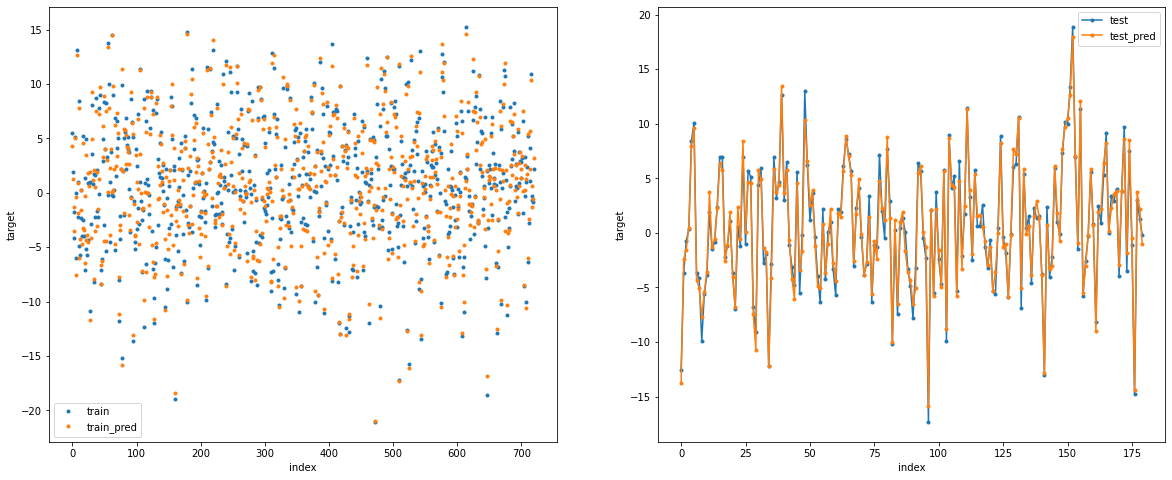

In [101]:
## Default
loss_function = 'squared_error'
learning_rate_method = 'constant'#'adaptive'#'invscaling'#'constant'
learning_rate = 0.001

reg_method = 'l2'
alpha = 0.0

shuffle_each_epoch = True

model = SGDRegressor(loss=loss_function, learning_rate=learning_rate_method, eta0=learning_rate, 
                     penalty=reg_method, alpha=alpha, 
                     shuffle=shuffle_each_epoch, 
                     random_state=0, max_iter=1000, tol=1e-10)
model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)
y_val_predict = model.predict(x_val)

print(model.n_iter_)
print(model.coef_)
plot_results(y_train, y_train_predict.reshape(-1,1), y_val, y_val_predict.reshape(-1,1))

dict_metrics_train = compute_metrics_regression(y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(y_val.values, y_val_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'val'] 
df_results

In [96]:
## Modelo final
model.fit(X_train_scaled, Y_train)
y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

## Evaluacion over Test

,mse,rmse,mae
Train,0.834357,0.913432,0.726109
Test,0.770572,0.877822,0.717999


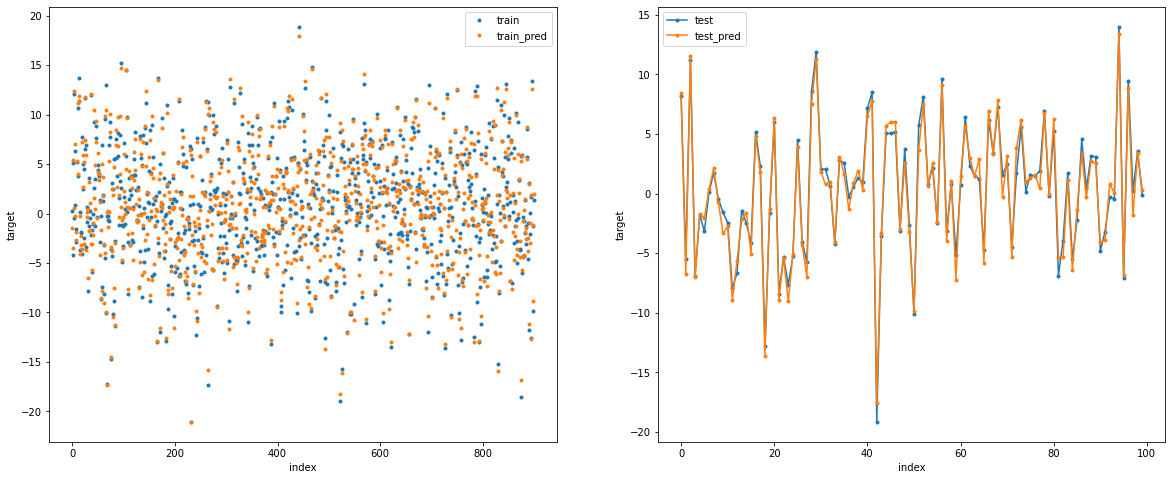

In [97]:
plot_results(Y_train, y_train_predict.reshape(-1,1), Y_test, y_test_predict.reshape(-1,1))

dict_metrics_train = compute_metrics_regression(Y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test.values, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['Train', 'Test'] 
df_results